In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./segmentation data.csv')

In [3]:
data.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [4]:
data.drop(columns='ID',inplace=True)

In [5]:
data.shape

(2000, 7)

In [6]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
data.isnull().mean()*100

Sex                0.0
Marital status     0.0
Age                0.0
Education          0.0
Income             0.0
Occupation         0.0
Settlement size    0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

#### Visualising data points

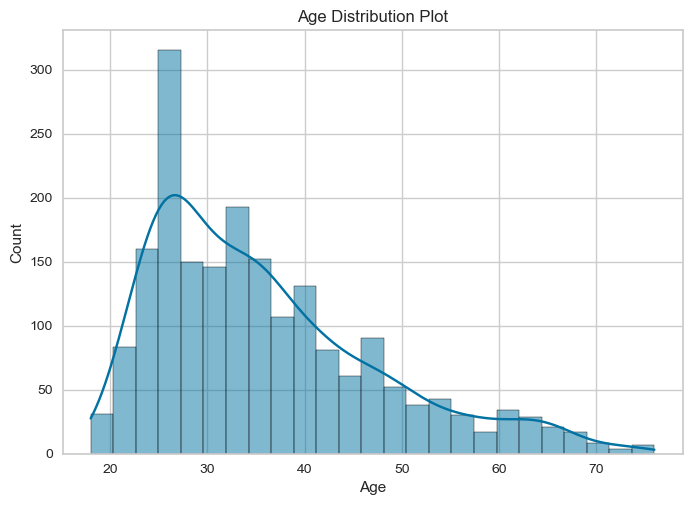

In [9]:
sns.histplot(data =data ,x ='Age',kde =True)
plt.title('Age Distribution Plot')
plt.show()

In [10]:
col = ['Sex', 'Marital status', 'Education', 'Occupation','Settlement size']

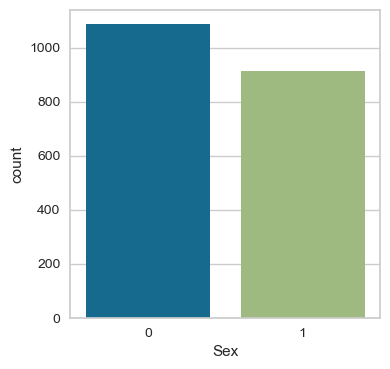

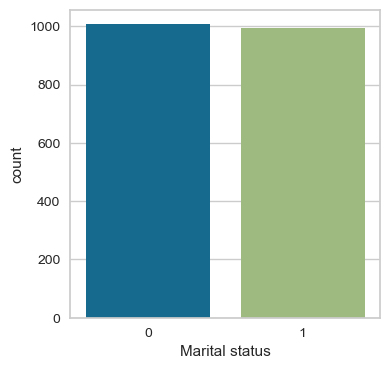

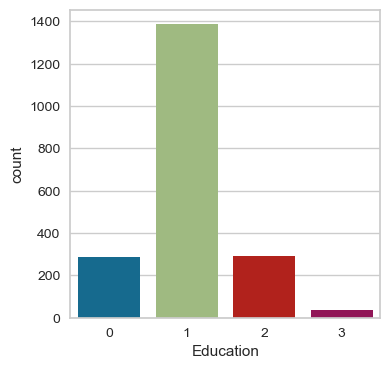

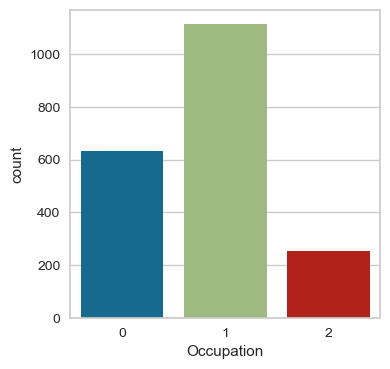

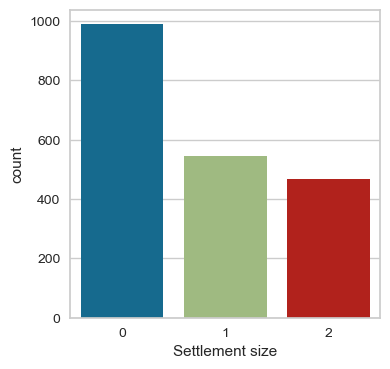

In [11]:
for i in col:
    plt.figure(figsize=(4,4))
    sns.countplot(data = data , x = i)
    plt.show()

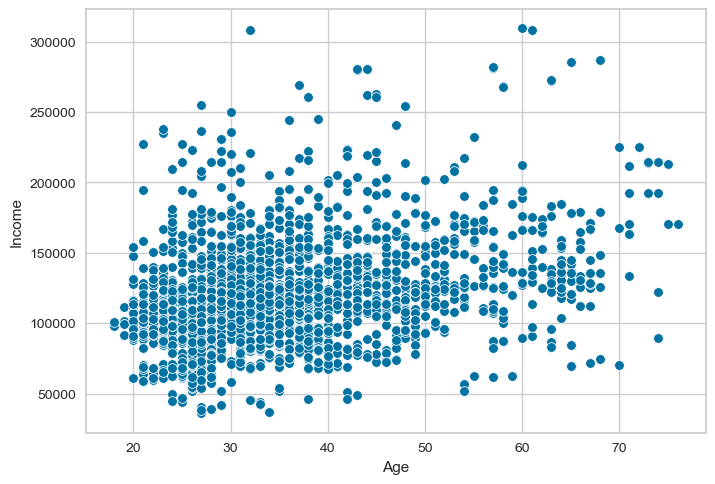

In [12]:
sns.scatterplot(data=data,x='Age', y = 'Income')
plt.show()

## Kmeans modelling

#### The Elbow method

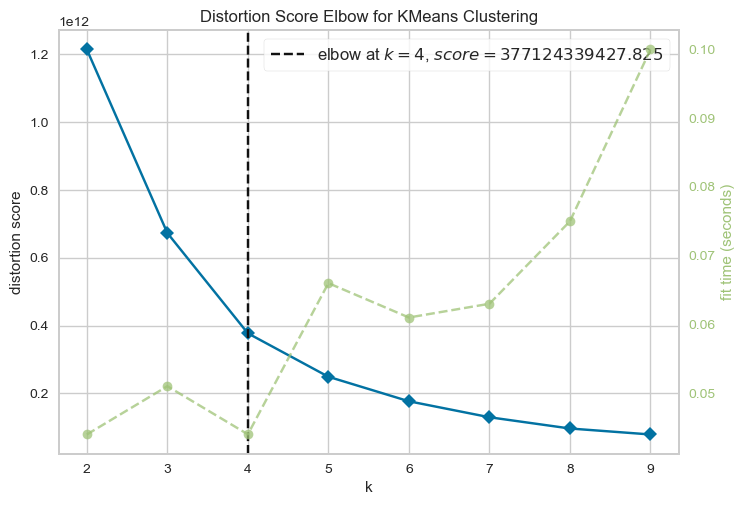

In [13]:
k_mean_yellowbrick=KMeans()
graph=KElbowVisualizer(k_mean_yellowbrick,k=range(2,10))
graph.fit(data)
graph.poof();

In [14]:
KM=KMeans(n_clusters=4,random_state=42)

In [15]:
KM.fit(data)

KMeans(n_clusters=4, random_state=42)

### Adding the cluster_id to dataframe

In [16]:
labels=KM.labels_

In [17]:
data['cluster_id']=labels

In [18]:
data.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_id
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3
5,0,0,35,1,144848,0,0,3
6,0,0,53,1,156495,1,1,3
7,0,0,35,1,193621,2,1,1
8,0,1,61,2,151591,0,0,3
9,0,1,28,1,174646,2,0,3


### Silhouette score

In [19]:
silhouette_score(data,labels)

0.5428478939907716

#### We can infer that the value is 0.54, hence our model is neither good or bad.

### plotting the clusters

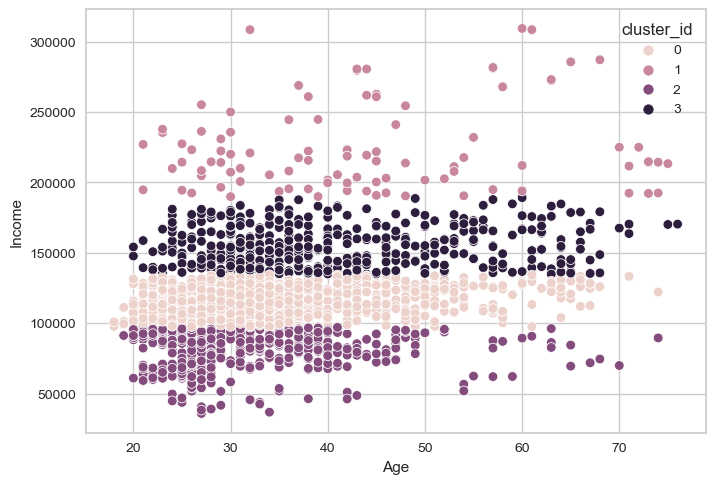

In [20]:
sns.scatterplot(data=data,x='Age',y='Income',hue='cluster_id')
plt.show()

### Silhouette plot

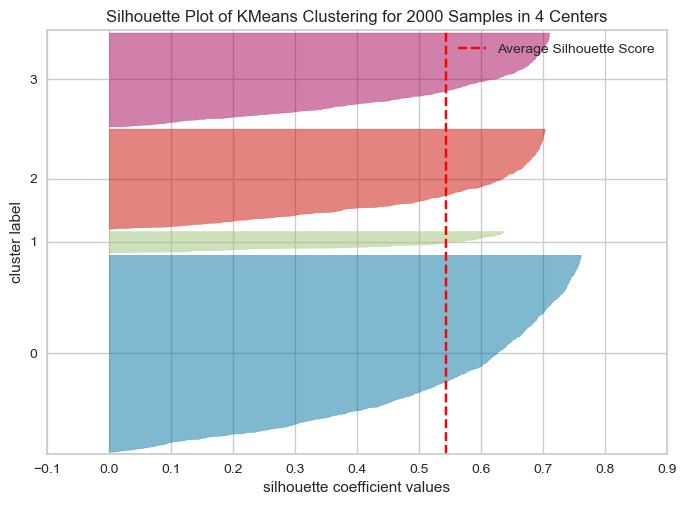

In [21]:
visualizer=SilhouetteVisualizer(KM,colors='yellowbrick')
visualizer.fit(data.drop(columns='cluster_id'))
visualizer.show();

### cluster size

In [22]:
km_cluster_sizes=data.groupby(['cluster_id']).size().to_frame()

In [23]:
km_cluster_sizes.columns=['km_cluster_sizes']

In [24]:
km_cluster_sizes

,km_cluster_sizes
cluster_id,
0,954
1,105
2,486
3,455
